In [1]:
 !wget "https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W" -O E-commerce.csv

--2024-10-04 01:04:51--  https://drive.google.com/uc?export=download&id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W
Resolving drive.google.com (drive.google.com)... 142.251.167.100, 142.251.167.139, 142.251.167.138, ...
Connecting to drive.google.com (drive.google.com)|142.251.167.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download [following]
--2024-10-04 01:04:51--  https://drive.usercontent.google.com/download?id=1lEccW5Y5_2z00VRtLGOAJOAU6YA9fl6W&export=download
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.16.132, 2607:f8b0:4004:c09::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.16.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 139827 (137K) [application/octet-stream]
Saving to: ‘E-commerce.csv’

E-commerce.csv      100%[===================>] 136.55K  --.-K

# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances
from sklearn.utils import check_array
import seaborn as sns
from sklearn.metrics import silhouette_score
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# from sklearn.decomposition import PCA

In [3]:

df=pd.read_csv("E-commerce.csv")
df.head()


,ID,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,1476,130,65,213.905831,31.600751,233,235
1,1535,543,46,639.223004,5.689175,228,170
2,1807,520,102,1157.402763,844.321606,247,409
3,1727,702,83,1195.903634,850.041757,148,200
4,1324,221,84,180.754616,64.283300,243,259


In [4]:
df=df.drop(['ID'], axis=1)
df.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
0,130,65,213.905831,31.600751,233,235
1,543,46,639.223004,5.689175,228,170
2,520,102,1157.402763,844.321606,247,409
3,702,83,1195.903634,850.041757,148,200
4,221,84,180.754616,64.283300,243,259


# KMeans
## Steps
**1. Initialization**
  -  Randomly initialize k centers from the dataset.

**2. Assignment**
  - For each point, we find the distance of existing centroids
from it and assign the point to that cluster whose centroid has the
minimum distance.

**3. Update**
  - Update the centroids of the clusters by taking the average of points from each cluster.

**4. Repeat**
  - Repeat the previous two steps until convergence (the center of new
cluster centroids stops changing their positions).

## Prepare data

In [5]:
def numerical_standardization(X):
  scaler=StandardScaler()
  scaler.fit(X)
  X=scaler.transform(X)
  return X


In [6]:

def get_distance(centroids, X,metric='euclidean'):
  if metric == 'euclidean':
    distances = euclidean_distances(centroids, X)
  elif metric == 'cosine':
    distances = cosine_similarity(centroids, X)
  elif metric == 'manhattan':
    distances = manhattan_distances(centroids, X)
  else:
    raise ValueError('Invalid metric')
  return distances

In [7]:
def KMeans(X,k,metric='euclidean',max_iterations = 1000 ):
  """
  KMeans clustering algorithm

  """
  # assert check_array(X, ensure_2d=True).all(), "X must be a 2D array"
  assert k > 0, "k must be a positive integer"
  assert metric in ['euclidean', 'cosine', 'manhattan'], "Invalid metric"
  assert max_iterations > 0, "max_iterations must be a positive integer"
  iterations = 0
  oldCentroids = None
  assignments = None
  # 1step initialize K centroids
  indexes = np.random.choice(X.shape[0],size=k)
  centroids = X[indexes]
  while not np.array_equal(centroids, oldCentroids) and iterations < max_iterations:
    oldCentroids = centroids
    # step 2.1  For each point, we find the distance of existing centroids from it
    distances = get_distance(centroids, X)
    # step 2.2 assign the point to that cluster whose centroid has the minimum distance.
    assignment = np.argmin(distances, axis=0)
    # step 3 Update the centroids of the clusters by taking the average of points from each cluster.
    centroids = np.array([X[assignment == i].mean(axis=0) for i in range(k)])
    # step 4 Repeat the previous two steps until convergence
    # (the center of new cluster centroids stops changing their positions).
    if np.array_equal(centroids, oldCentroids):
      return assignment, centroids, iterations

    iterations += 1
  return assignment, centroids, iterations

In [8]:
X=df.to_numpy()
X  = numerical_standardization(X)
X.shape, X[0,:], X.dtype

((2500, 6),
 array([-1.49525046, -0.75853514, -1.05461141, -0.73280039,  0.32311781,
         0.33919174]),
 dtype('float64'))

In [9]:
assignment, centroids , iterations= KMeans(X,k=3,metric='euclidean',max_iterations = 1000 )
print(iterations)

10


# Assign Cluster Labels

In [10]:
def assign_cluster_labels(df, assignment, k):
  for i in range(k):
    df.loc[assignment==i,'cluster']=i
    # df.loc[assignment==0,'cluster']=0
    # df.loc[assignment==1,'cluster']=1
    # df.loc[assignment==2,'cluster']=2
    # df.loc[assignment==3,'cluster']=3
  return df

In [11]:
cluster_labels=assign_cluster_labels(df, assignment, k=3)
cluster_labels.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,130,65,213.905831,31.600751,233,235,0.0
1,543,46,639.223004,5.689175,228,170,0.0
2,520,102,1157.402763,844.321606,247,409,1.0
3,702,83,1195.903634,850.041757,148,200,1.0
4,221,84,180.754616,64.283300,243,259,0.0


# Analyze Cluster groups

In [12]:
df.groupby('cluster').mean()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
cluster,,,,,,
0.0,383.439430,89.468725,657.543066,152.681765,201.572447,196.035629
1.0,594.646970,127.522727,1387.991594,1109.687840,202.440909,198.263636
2.0,251.211438,67.634315,3234.272996,79.792978,197.984402,215.171577


# Visualize Cluster

## Visualize using PCA

In [13]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
df_standard = numerical_standardization(df.drop('cluster',axis=1))
pca.fit(df_standard)
X_pca=pca.transform(df_standard)
X_pca.shape

(2500, 2)

In [14]:
clusters = pd.DataFrame(X_pca, columns=['X1', 'X2'])
clusters['label'] = df['cluster']
clusters.head(3)

,X1,X2,label
0,-1.378656,-0.606294,0.0
1,-0.453336,-0.915778,0.0
2,0.912088,1.587554,1.0


In [15]:
centroid_pca = pca.transform(centroids)
centroid_pca.shape, centroid_pca

((3, 2),
 array([[-0.21660378, -0.62412924],
        [ 1.85582046,  0.50253703],
        [-1.6486498 ,  0.79133586]]))

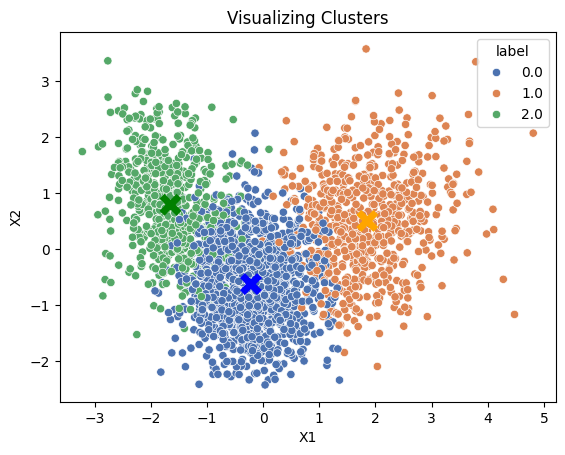

In [16]:
def viz_clusters(clusters, centroid=None, c=['blue', 'orange','green']):
  sns.scatterplot(data=clusters, x='X1', y='X2', hue='label', palette='deep')
  # sns.scatterplot(data=clusters, x='X1', y='X2', hue='label', palette='deep')
  if centroid is not None:
    plt.scatter(centroid[:, 0], centroid[:, 1],  marker = "x", s=150,
      linewidths = 5, zorder = 10, c=c)
  plt.title('Visualizing Clusters')
viz_clusters(clusters, centroid_pca)

## Visualization TSNE

In [17]:
from sklearn.manifold import TSNE

tsne = TSNE(2)

components_tsne = tsne.fit_transform(df_standard)

In [18]:
clusters_tsne = pd.DataFrame(components_tsne, columns=['X1', 'X2'])
clusters_tsne['label'] = df['cluster']
clusters_tsne.head(3)

,X1,X2,label
0,-15.781979,5.905505,0.0
1,-9.201612,12.850561,0.0
2,34.845371,10.658957,1.0


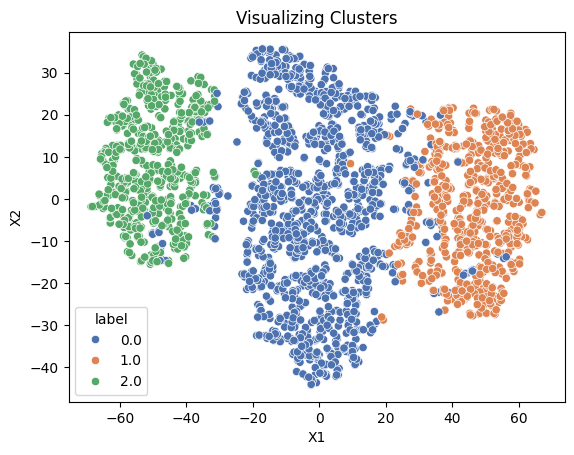

In [19]:
viz_clusters(clusters_tsne)

# Cluster Evaluation

**1. Within-Cluster Sum-Of-Squares (WCSS)**

  The K-means algorithm aims to choose centroids that minimise the inertia, or within-cluster sum-of-squares criterion:

  <b><p><center>$\sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)$</center></p></b>

**2. Silhouette Coefficient**

  - Useful when ground truth label is not available
  - Higher Silhouette Coefficient score relates to a model with better defined clusters.
  
  - The Silhouette Coefficient is defined for each sample and is composed of two scores:

      ```
      a: The mean distance between a sample and all other points in the same class.

      b: The mean distance between a sample and all other points in the next nearest cluster.
      ```

    <b><center><p>$s = \frac{b - a}{max(a, b)}$</p></center></b>



  Advantages:

  - The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

  - The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.


  Drawbacks:

  - The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [20]:
import numpy as np
def wcss_score(X, centroids, assignment):
  """
  Calculates the Within-Cluster Sum-of-Squares (WCSS) for a given dataset, centroids, and assignments.

      \sum_{i=0}^{n}\min_{\mu_j \in C}(||x_i - \mu_j||^2)
      https://scikit-learn.org/stable/modules/clustering.html

  """
  wcss = 0
  for i in range(len(centroids)):
    cluster_points = X[assignment == i]
    distances = np.linalg.norm(cluster_points - centroids[i], axis=1)
    wcss += np.sum(distances ** 2)
  return wcss

wcss = wcss_score(X, centroids, assignment)
print(f"Within-Cluster Sum-of-Squares (WCSS): {wcss}")

Within-Cluster Sum-of-Squares (WCSS): 9211.74189083972


In [21]:
silhouette_avg = silhouette_score(X, assignment)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.24838543165070934


In [22]:
wcss_values = []
silhouette_scores = []
for k in range(2,10):
  assignment, centroids , iterations= KMeans(X,k=k,metric='euclidean',max_iterations =10000)
  wcss_val = wcss_score(X, centroids, assignment)
  silhouette_avg = silhouette_score(X, assignment)
  wcss_values.append(wcss_val)
  silhouette_scores.append(silhouette_avg)

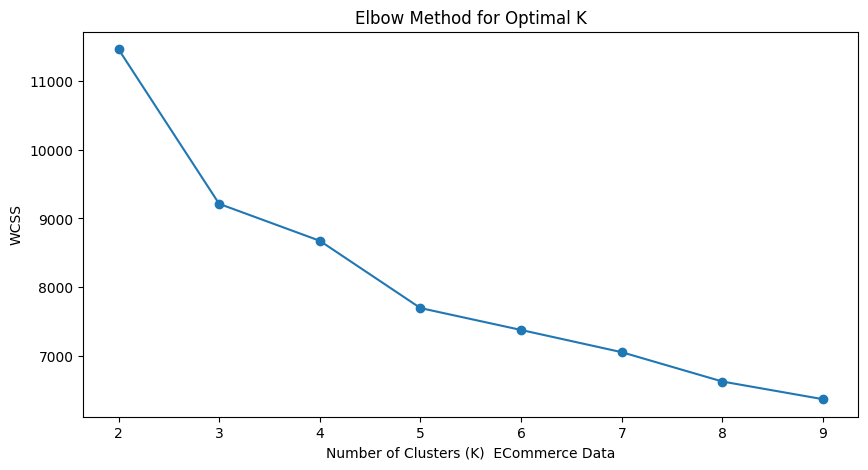

In [23]:

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), wcss_values, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)  ECommerce Data')
plt.ylabel('WCSS')
plt.show()



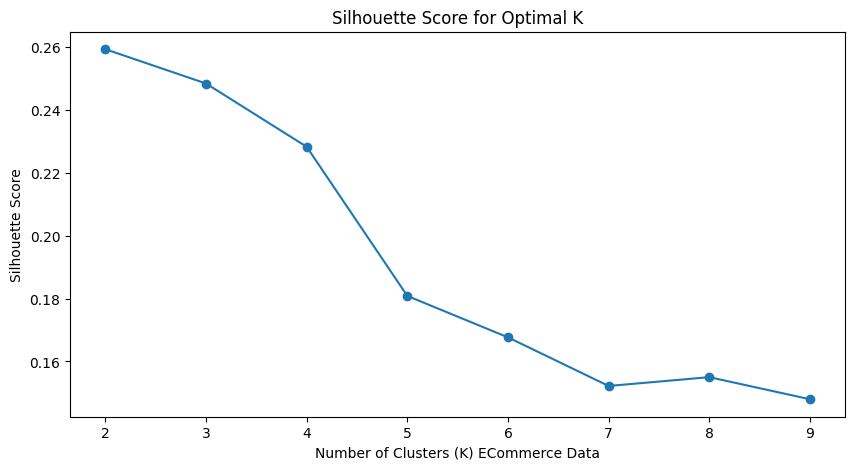

In [24]:
plt.figure(figsize=(10, 5))
plt.plot(range(2, 10), silhouette_scores, marker='o')
plt.title('Silhouette Score for Optimal K')
plt.xlabel('Number of Clusters (K) ECommerce Data')
plt.ylabel('Silhouette Score')
plt.show()


## Adhoc KPI Analysis

In [25]:
assignment, centroids , iterations= KMeans(X,k=3,metric='euclidean',max_iterations = 1000 )
print(iterations)

12


In [26]:
cluster_labels=assign_cluster_labels(df, assignment, k=3)
cluster_labels.head()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information,cluster
0,130,65,213.905831,31.600751,233,235,1.0
1,543,46,639.223004,5.689175,228,170,1.0
2,520,102,1157.402763,844.321606,247,409,0.0
3,702,83,1195.903634,850.041757,148,200,0.0
4,221,84,180.754616,64.283300,243,259,1.0


In [27]:
cluster_labels.groupby('cluster').mean()

,n_clicks,n_visits,amount_spent,amount_discount,days_since_registration,profile_information
cluster,,,,,,
0.0,594.646970,127.522727,1387.991594,1109.687840,202.440909,198.263636
1.0,383.439430,89.468725,657.543066,152.681765,201.572447,196.035629
2.0,251.211438,67.634315,3234.272996,79.792978,197.984402,215.171577


## Intution
- `Cluster 2` customers are `spending more` and `avg discount is also low`, they are `high spenders with infrequent login`, and less clicks. This `persona` seems `high earners/Rich`.
- `Cluster 0` customers are having `Highest discount`, they are clicking far more than other personas and they are visitng more frquently, `seems like they need more discount before they buy`

## MNIST Usecase

In [30]:
def load_fashionData():
  # Load Fashion Mnist dataset
  import tensorflow as tf
  fashion_mnist = tf.keras.datasets.fashion_mnist

  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

  # our train data is images (28*28) we need to flatten it
  flatten_train_images = []
  for image in train_images:
    flatten_train_images.append(image.flatten())

  # convert in numpy array
  flatten_train_images = np.array(flatten_train_images)
  # normalize images
  flatten_train_images = flatten_train_images / 255


  # our test data is images (28*28) we need to flatten it
  flatten_test_images = []
  for image in test_images:
    flatten_test_images.append(image.flatten())

  # convert in numpy array
  flatten_test_images = np.array(flatten_test_images)
  # normalize images
  flatten_test_images = flatten_test_images / 255

  # combine test and train data
  fshn_mnist_data =  np.concatenate((flatten_train_images, flatten_test_images), axis = 0)
  fshn_mnist_labels = np.concatenate((train_labels, test_labels), axis = 0)

  return fshn_mnist_data, fshn_mnist_labels

In [39]:
fshn_mnist_data, fshn_mnist_labels = load_fashionData()

In [40]:
## PCA Visualization
from sklearn.preprocessing import StandardScaler
# fshn_mnist_data_standard = StandardScaler().fit_transform(fshn_mnist_data)
pca_fshn = PCA(n_components=2)
pca_fshn.fit(fshn_mnist_data)
X_fshn_pca = pca_fshn.transform(fshn_mnist_data)
X_fshn_pca.shape

(70000, 2)

<Axes: >

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


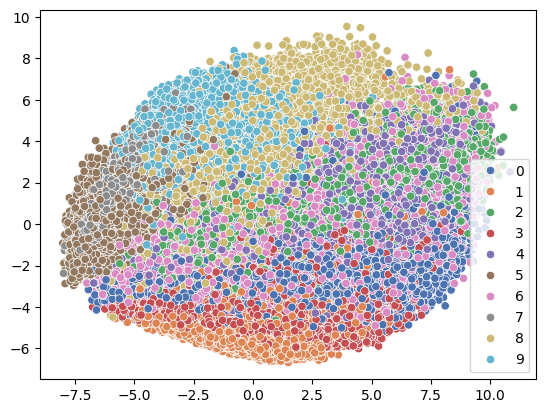

In [41]:
sns.scatterplot(x=X_fshn_pca[:,0], y=X_fshn_pca[:,1], hue=fshn_mnist_labels, palette='deep')

In [43]:
from sklearn.manifold import TSNE

tsne_fshn = TSNE(2)

components_tsne_fshn = tsne_fshn.fit_transform(fshn_mnist_data)

<Axes: >

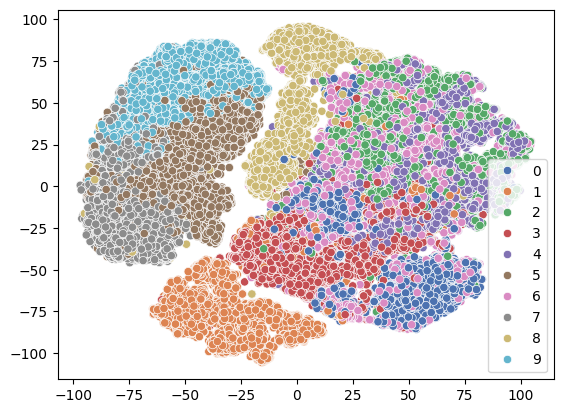

In [44]:
sns.scatterplot(x=components_tsne_fshn[:,0], y=components_tsne_fshn[:,1], hue=fshn_mnist_labels, palette='deep')

In [ ]:
def viz_clusters(clusters, centroid=None, c=['blue', 'orange','green']):

  # sns.scatterplot(data=clusters, x='X1', y='X2', hue='label', palette='deep')
  if centroid is not None:
    plt.scatter(centroid[:, 0], centroid[:, 1],  marker = "x", s=150,
      linewidths = 5, zorder = 10, c=c)
  plt.title('Visualizing Clusters')
viz_clusters(clusters, centroid_pca)

In [29]:
## TSNE Visualization

In [ ]:
wcss_values_fshn = []
silhouette_scores_fshn = []
for k in range(2,10):
  assignment, centroids , iterations= KMeans(fshn_mnist_data,k=k,metric='euclidean',max_iterations =10000)
  wcss_val = wcss_score(fshn_mnist_data, centroids, assignment)
  silhouette_avg = silhouette_score(fshn_mnist_data, assignment)
  wcss_values_fshn.append(wcss_val)
  silhouette_scores_fshn.append(silhouette_avg)